<a href="https://colab.research.google.com/github/Ziadnasser1/Machine-Learning-Training/blob/master/FashionMnist(ANN_%26_CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Loading Data

Getting the fashion mnist data and normalizing it.

In [2]:
images_data = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = images_data.load_data()
train_images = train_images/ 255.0
test_images = test_images/ 255.0

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)


4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Splitting the data
Splitting the data to train, test and validate.

In [3]:
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.16666, random_state=42)
print(train_images.shape)
print(val_images.shape)

(50000, 28, 28)
(10000, 28, 28)


#Plotting samples of the data.

<function matplotlib.pyplot.show(close=None, block=None)>

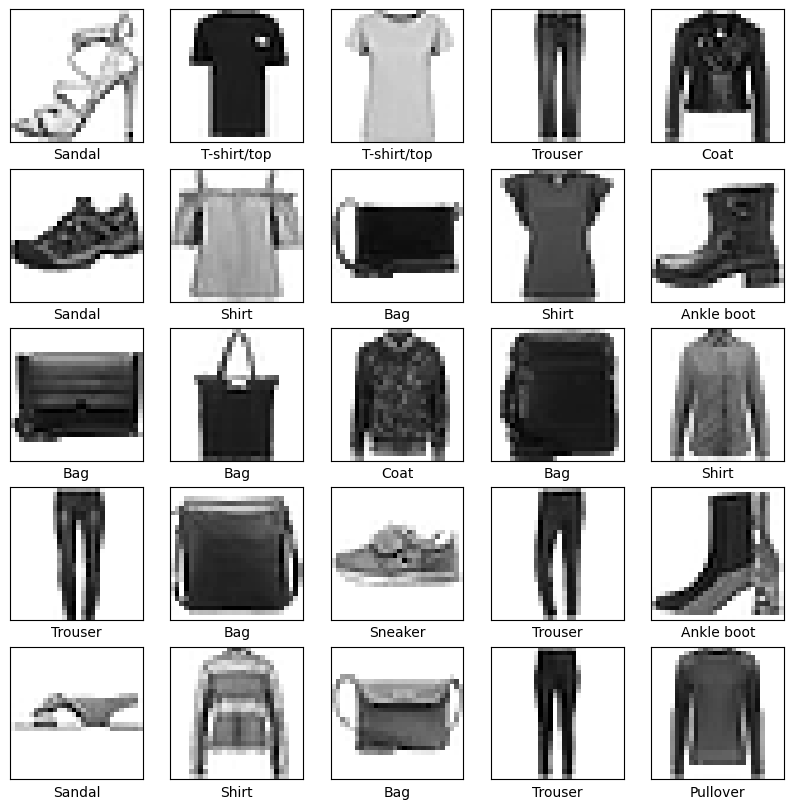

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show

# Different architectures

# **First Architecture**.

Trying the first model which contain: 2 hidden layers "relu activation" and 1 ouput layer "softmax activation".And using "Adam" as optimizer.

In [14]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', name="L1"),
    tf.keras.layers.Dense(128, activation='relu', name="L2"),
    tf.keras.layers.Dense(10, activation='softmax', name="Output")
])

model1.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy']
              )
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 L1 (Dense)                  (None, 128)               100480    
                                                                 
 L2 (Dense)                  (None, 128)               16512     
                                                                 
 Output (Dense)              (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **Second Architecture**.

Trying the second model which contain: 2 hidden layers "relu activation" and 1 ouput layer "softmax activation".And using "Adam" as optimizer.
This time we changed the number of neurons inside one of the layers and added "Dropout" after each layer.

In [15]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu', name="L1"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu', name="L2"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax', name="Output")
])

model2.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy']
              )
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 L1 (Dense)                  (None, 256)               200960    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 L2 (Dense)                  (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 Output (Dense)              (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235

Trying the Third model which contain: 3 hidden layers "relu activation" and 1 ouput layer "softmax activation".
"Adam" as optimizer but his time we changed the learning rate.
Also, we increased the number of neurons in the second layer.
And increased the percentage of the dropout.

# **Third Architecture**.

In [16]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu', name="L1"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu', name="L2"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu', name="L3"),
    tf.keras.layers.Dense(10, activation='softmax')
])

model3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
model3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 L1 (Dense)                  (None, 256)               200960    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 L2 (Dense)                  (None, 256)               65792     
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 L3 (Dense)                  (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)               

# **Fourth Architecture**.

Trying the Fourth model which is **CNN**:
it contains: 2 convolutional layers "relu activation" each one followed by a maxpooling layer , a Dense layer to increase the model capacity and the ouput layer "softmax activation".
"Adam" as optimizer.

In [12]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name="Conv1"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', name="Conv2"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', name="Dense1"),
    tf.keras.layers.Dense(10, activation='softmax', name="Output")
])

model4.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 Conv2 (Conv2D)              (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 Dense1 (Dense)              (None, 128)              

# Fitting the models
training the model and then evaluating it against the new data to get the loss and accuracy of each model.

In [17]:
models = [model1, model2, model3, model4]
results = {}
for i, model in enumerate(models):
    print(f" Model {i+1}")
    model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print(f"Model {i+1} - Test Accuracy: {test_acc}, Test Loss: {test_loss}")
    results[f"Model {i+1}"] = {
        'accuracy': test_acc,
        'loss': test_loss
    }

 Model 1
Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 0.5016 - accuracy: 0.8204 - val_loss: 0.3906 - val_accuracy: 0.8561
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3712 - accuracy: 0.8640 - val_loss: 0.3736 - val_accuracy: 0.8613
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3324 - accuracy: 0.8766 - val_loss: 0.3476 - val_accuracy: 0.8707
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3062 - accuracy: 0.8865 - val_loss: 0.3356 - val_accuracy: 0.8741
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2893 - accuracy: 0.8911 - val_loss: 0.3262 - val_accuracy: 0.8818
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2755 - accuracy: 0.8967 - val_loss: 0.3289 - val_accuracy: 0.8825
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2628 - accuracy: 0.9018 - val_loss: 0.3304 - val_

In [19]:
for model_name, result in results.items():
    print(f"{model_name}: Accuracy = {result['accuracy']}, Loss = {result['loss']}")


Model 1: Accuracy = 0.8802000284194946, Loss = 0.3457302749156952
Model 2: Accuracy = 0.875, Loss = 0.35074716806411743
Model 3: Accuracy = 0.8808000087738037, Loss = 0.33386117219924927
Model 4: Accuracy = 0.9038000106811523, Loss = 0.3224143087863922


# Predict new sample class.

In [20]:
def predict(model, sample):
    prediction = model.predict(np.expand_dims(sample, axis=0))
    predicted_class = np.argmax(prediction)
    print(f"Predicted Class: {predicted_class}")
    return predicted_class

sample_index = 0
sample = test_images[sample_index]
print(f"True Class: {test_labels[sample_index]}")
predict(model1, sample)
predict(model2, sample)
predict(model3, sample)
predict(model4, sample)

True Class: 9
1/1 [==============================] - 0s 166ms/step
Predicted Class: 9
1/1 [==============================] - 0s 60ms/step
Predicted Class: 9
1/1 [==============================] - 0s 74ms/step
Predicted Class: 9
1/1 [==============================] - 0s 77ms/step
Predicted Class: 9


9

# Bar Plot Accuracy
comparing each model accuracy by plotting

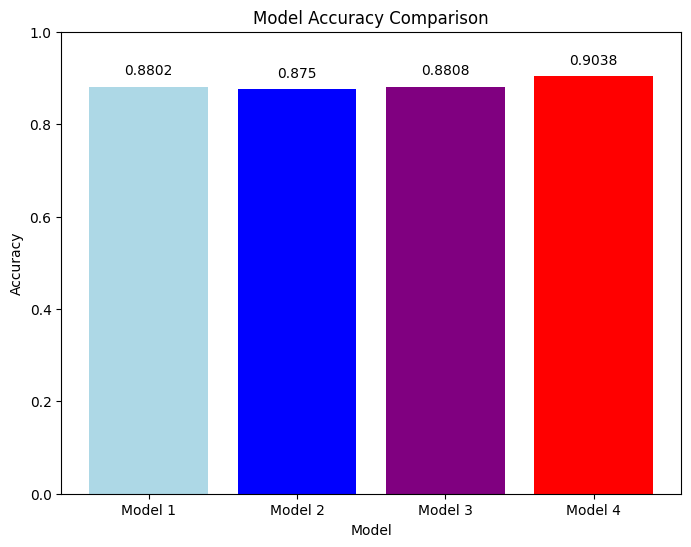

In [25]:
def plot_model_accuracies(results):
    model_names = list(results.keys())
    accuracies = [results[model]['accuracy'] for model in model_names]
    color = ['lightblue', 'blue', 'purple', 'red']
    plt.figure(figsize=(8, 6))
    bars = plt.bar(model_names, accuracies, color=color,)
    for bar, accuracy in zip(bars, accuracies):
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            yval + 0.02,
            f"{yval:.04}",
            ha="center",
            va="bottom",
        )
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.show()

plot_model_accuracies(results)